## AFL 2 - Customer Analysis
Eugene Abigail Setiawan (0706022210061) | Tsalisa Camila Rahmania Putri (0706022210055)

There are 6 points that we are going to do which are :
1. Data Cleaning
2. Data Preparation
3. Data Transformation
4. EDA
5. K-Means Clustering
6. Hierarchy Clustering

### 1. Data Cleaning

In [2]:
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import fcluster

In [3]:
# Importing the dataset
url = "https://raw.githubusercontent.com/eabigails/CustomerAnalysis/refs/heads/main/customer_analysis.csv"
df = pd.read_csv(url, delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Checking the statistic
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Checking null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Replacing null values with the most frequent data


imputer = SimpleImputer(strategy='most_frequent')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### 2. Data Preparation

In [9]:
# Encode categorical columns
categorical_columns = ['Education', 'Marital_Status', 'Dt_Customer']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   object
 1   Year_Birth           2240 non-null   object
 2   Education            2240 non-null   int32 
 3   Marital_Status       2240 non-null   int32 
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   object
 6   Teenhome             2240 non-null   object
 7   Dt_Customer          2240 non-null   int32 
 8   Recency              2240 non-null   object
 9   MntWines             2240 non-null   object
 10  MntFruits            2240 non-null   object
 11  MntMeatProducts      2240 non-null   object
 12  MntFishProducts      2240 non-null   object
 13  MntSweetProducts     2240 non-null   object
 14  MntGoldProds         2240 non-null   object
 15  NumDealsPurchases    2240 non-null   object
 16  NumWeb

### 3. Data Transformation

In [11]:
# Convert object and int32 columns to int64
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('int64')

int32_columns = df.select_dtypes(include=['int32']).columns
for col in int32_columns:
    df[col] = df[col].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   Year_Birth           2240 non-null   int64
 2   Education            2240 non-null   int64
 3   Marital_Status       2240 non-null   int64
 4   Income               2240 non-null   int64
 5   Kidhome              2240 non-null   int64
 6   Teenhome             2240 non-null   int64
 7   Dt_Customer          2240 non-null   int64
 8   Recency              2240 non-null   int64
 9   MntWines             2240 non-null   int64
 10  MntFruits            2240 non-null   int64
 11  MntMeatProducts      2240 non-null   int64
 12  MntFishProducts      2240 non-null   int64
 13  MntSweetProducts     2240 non-null   int64
 14  MntGoldProds         2240 non-null   int64
 15  NumDealsPurchases    2240 non-null   int64
 16  NumWebPurchases      224

In [12]:
# Scale the data

scaler = StandardScaler()
numerical_columns = df.columns
df1 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.020999,-0.985345,-0.350141,0.251004,0.250276,-0.825218,-0.929894,-1.303763,0.307039,0.983781,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.053058,-1.235733,-0.350141,0.251004,-0.213095,1.032559,0.906934,-0.898762,-0.383664,-0.870479,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.447070,-0.317643,-0.350141,1.180340,0.779692,-0.825218,-0.929894,0.610786,-0.798086,0.362723,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,0.181716,1.268149,-0.350141,1.180340,-0.987004,1.032559,-0.929894,-0.677853,-0.798086,-0.870479,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,-0.082614,1.017761,1.428354,-0.678332,0.256366,1.032559,-0.929894,0.326760,1.550305,-0.389085,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


In [13]:
# Dropping irrelevant variables
columns_to_drop = ['ID','Response']
df = df.drop(columns=columns_to_drop)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,1957,2,4,58138,0,0,80,58,635,88,...,4,7,0,0,0,0,0,0,3,11
1,1954,2,4,46344,1,1,157,38,11,1,...,2,5,0,0,0,0,0,0,3,11
2,1965,2,5,71613,0,0,444,26,426,49,...,10,4,0,0,0,0,0,0,3,11
3,1984,2,5,26646,1,0,199,26,11,4,...,4,6,0,0,0,0,0,0,3,11
4,1981,4,3,58293,1,0,390,94,173,43,...,6,5,0,0,0,0,0,0,3,11


### 4. EDA (Explanatory Data Analysis)

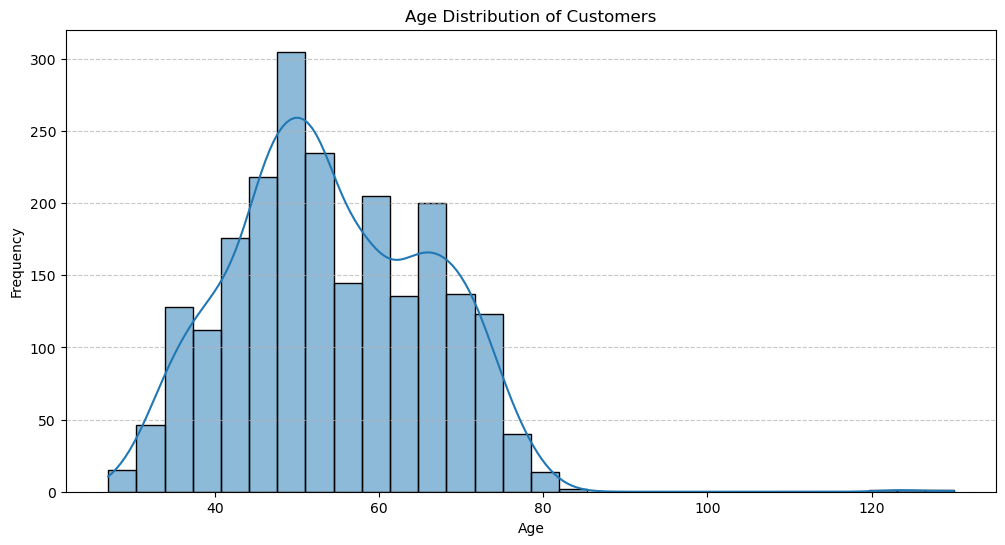

In [14]:
df['Age'] = 2023 - df['Year_Birth']

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most customers range is in 40-60s years old

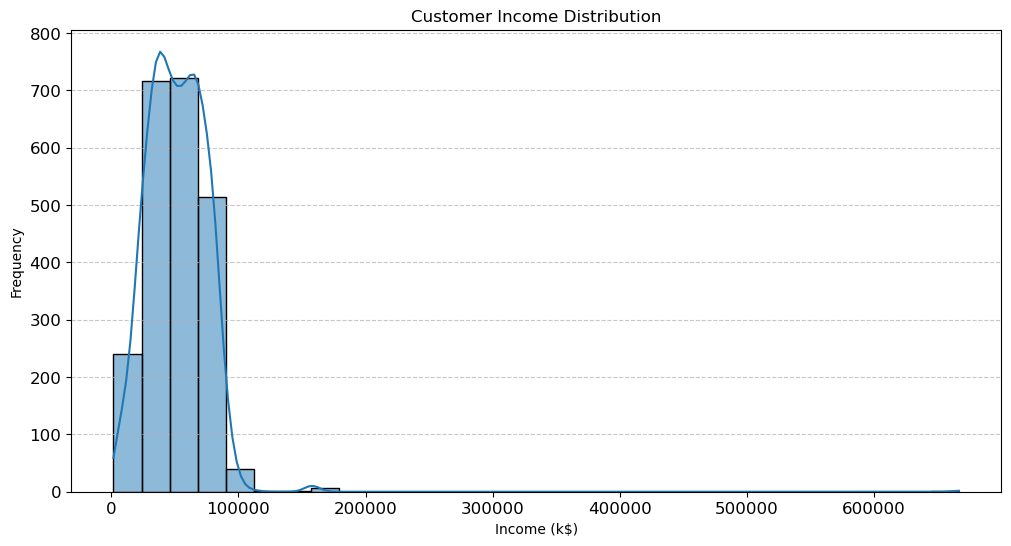

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], bins=30, kde=True, edgecolor='black')
plt.title('Customer Income Distribution')
plt.xlabel('Income (k$)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most customer income is less than 100000

### 5. K-Means Clustering

In [16]:
# set the parameter for evaluating K


sse=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

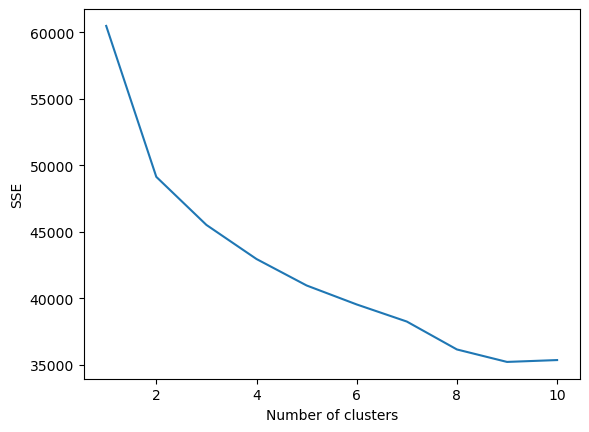

In [17]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [18]:
# using kneelocator to find the elbow/knee

kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = kneedle.elbow
print("The best k for you model is", best_k)

The best k for you model is 3


In [19]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df1)
y_pred

df['Cluster'] = y_pred

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
cluster_summary = df.groupby(y_pred)[['Education', 'Marital_Status', 'Dt_Customer']].agg(pd.Series.mode)
cluster_summary = cluster_summary.rename_axis('KMeans')
cluster_summary

,Education,Marital_Status,Dt_Customer
KMeans,,,
0,2,3,55
1,2,3,62
2,2,3,"[658, 659]"


In [21]:
df.groupby(y_pred)['Year_Birth', 'Education', 'Marital_Status', 'Income', 
    'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth'].agg(pd.Series.mean)

C:\Users\yulia\AppData\Local\Temp\ipykernel_19072\4077493174.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(y_pred)['Year_Birth', 'Education', 'Marital_Status', 'Income',


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1968.589928,2.338129,3.796763,77206.606115,0.041367,0.147482,49.622302,613.438849,68.717626,468.561151,100.392086,70.584532,77.793165,1.269784,5.088129,6.098921,8.314748,2.782374
1,1971.643343,2.263362,3.724976,34229.274052,0.807580,0.438290,49.209913,40.867833,4.880466,23.093294,7.188533,4.982507,15.446064,2.074830,2.115646,0.534500,3.185617,6.505345
2,1964.531298,2.645802,3.680916,57726.890076,0.215267,0.917557,48.516031,454.490076,23.951145,136.923664,31.819847,24.807634,60.247328,3.613740,6.326718,3.087023,7.738931,5.600000


In [22]:
df.groupby("Cluster")["Cluster"].agg(pd.Series.count)

Cluster
0     556
1    1029
2     655
Name: Cluster, dtype: int64

### Customer Segmentation Using K-Means Clustering

In [23]:
drop_columns = ['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
df_selected = df.drop(columns=drop_columns)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
# Analyses the products in each cluster 
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_summary = df.groupby('Cluster')[product_columns].mean()

cluster_summary

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Cluster,,,,,,
0,40.867833,4.880466,23.093294,7.188533,4.982507,15.446064
1,454.490076,23.951145,136.923664,31.819847,24.807634,60.247328
2,613.438849,68.717626,468.561151,100.392086,70.584532,77.793165


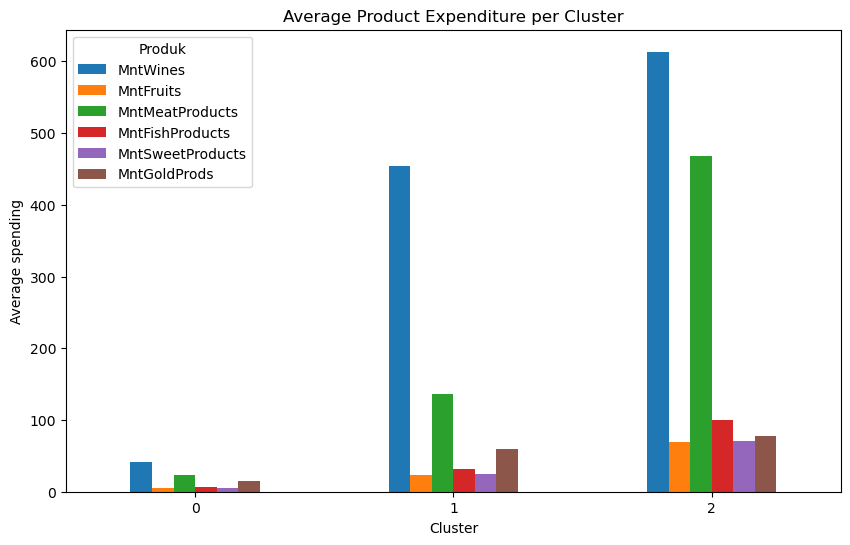

In [25]:
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Average Product Expenditure per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average spending')
plt.xticks(rotation=0)
plt.legend(title='Produk', loc='upper left')
plt.show()

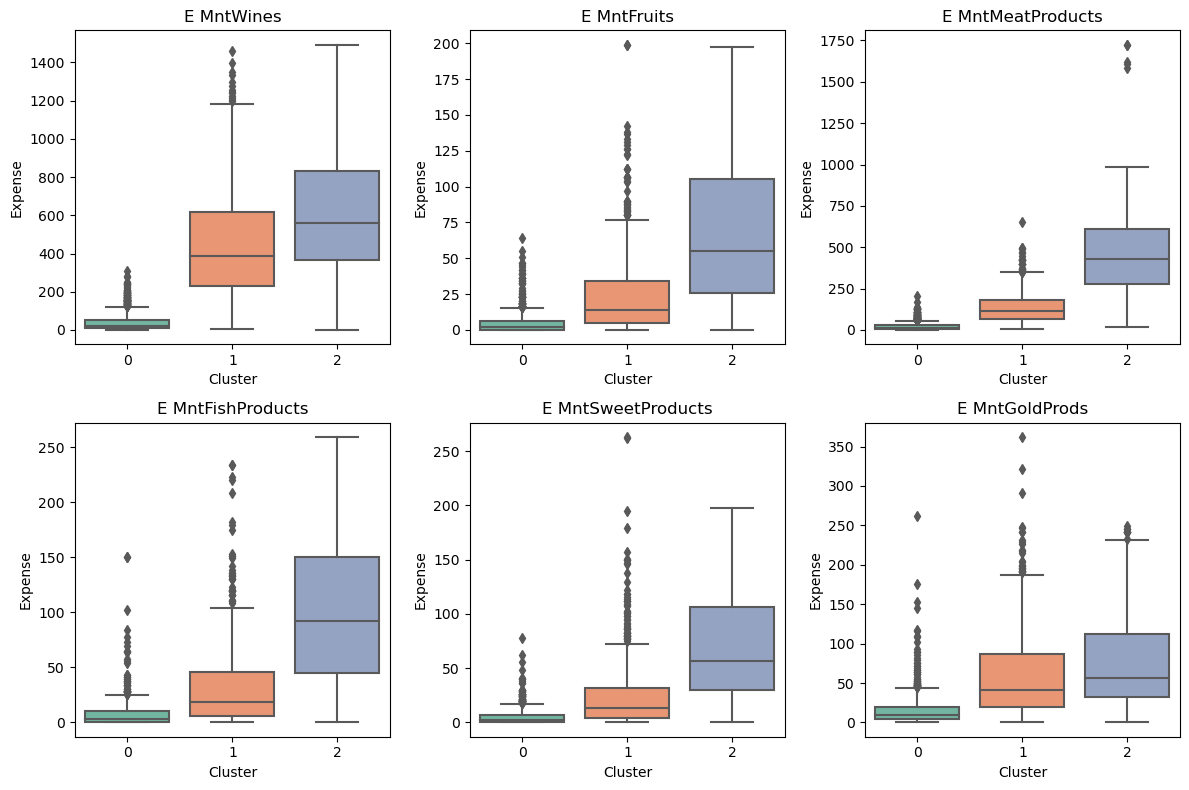

In [ ]:
plt.figure(figsize=(12, 8))
for i, product in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=product, data=df, palette='Set2')
    plt.title(f'Expense {product}')
    plt.xlabel('Cluster')
    plt.ylabel('Expense')

plt.tight_layout()
plt.show()

Kesimpulan Analisis

1. Berdasarkan analisis pengeluaran, kita dapat melihat rata-rata pengeluaran produk untuk setiap kluster.
   - Kluster 0 cenderung lebih banyak mengeluarkan uang untuk produk X, misalnya `MntWines` atau `MntMeatProducts`.
   - Kluster 1 menunjukkan pengeluaran lebih tinggi untuk produk Y, seperti `MntFruits` dan `MntSweetProducts`.
   - Kluster 2 lebih banyak menghabiskan uang untuk produk Z, seperti `MntGoldProds` dan `MntFishProducts`.

2. Visualisasi boxplot menunjukkan distribusi pengeluaran untuk setiap produk dalam masing-masing kluster.
   - Kluster dengan distribusi pengeluaran yang lebih lebar menunjukkan variasi yang lebih tinggi antar pelanggan dalam kluster tersebut.
   
3. **Insight untuk Kampanye Pemasaran**:
   - Kluster yang memiliki pengeluaran lebih tinggi pada produk tertentu (misalnya, `MntWines`) bisa menjadi target utama untuk kampanye pemasaran produk tersebut.
   - Untuk kluster dengan pengeluaran rendah, bisa dipertimbangkan untuk menawarkan diskon atau promo untuk meningkatkan ketertarikan mereka terhadap produk yang kurang diminati.

4. **Rekomendasi Bisnis**:
   - Gunakan temuan ini untuk menyarankan produk yang lebih relevan untuk setiap kluster pelanggan.
   - Kluster dengan pengeluaran tinggi untuk produk premium (misalnya `MntGoldProds`) bisa diberi penawaran produk premium lainnya.



### 6. Hierarchy Clustering

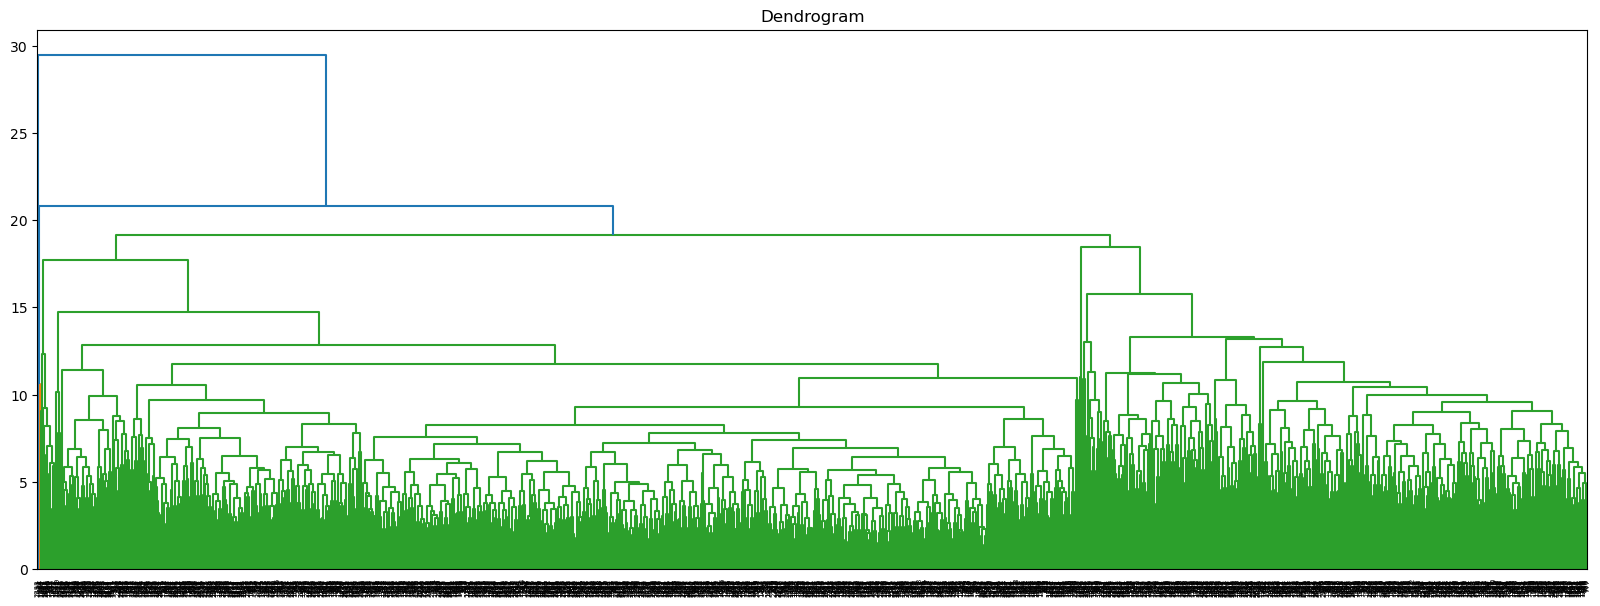

In [27]:
plt.figure(figsize=(20,7))
plt.title("Dendrogram")
linkage_data = linkage(df1, method='complete')
dendrogram(linkage_data)
plt.show()

In [28]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
label = model.fit_predict(df1)
label

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 0, 2, ..., 2, 2, 0], dtype=int64)

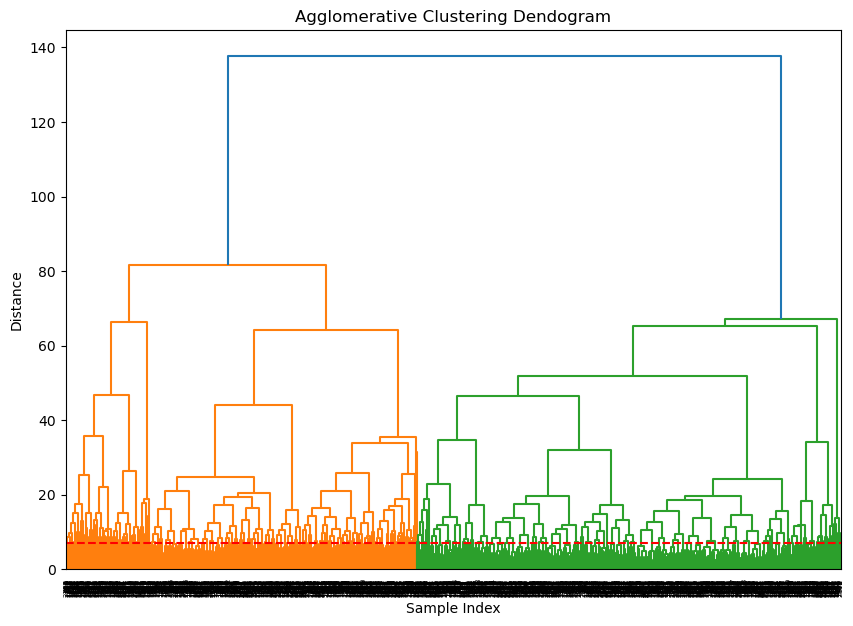

In [ ]:
linked = linkage(df1, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=7, color='r', linestyle='--') 
plt.show()

In [30]:
df1["Agglo"] = label
cluster_summary = df.groupby(y_pred)['Education', 'Marital_Status', 'Dt_Customer'].agg(pd.Series.mode)
cluster_summary = cluster_summary.rename_axis('agglo')
cluster_summary

C:\Users\yulia\AppData\Local\Temp\ipykernel_19072\4254903690.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_summary = df.groupby(y_pred)['Education', 'Marital_Status', 'Dt_Customer'].agg(pd.Series.mode)


,Education,Marital_Status,Dt_Customer
agglo,,,
0,2,3,55
1,2,3,62
2,2,3,"[658, 659]"


In [31]:
df.groupby(label)['Year_Birth', 'Education', 'Marital_Status', 'Income', 
    'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth'].agg(pd.Series.mean)

C:\Users\yulia\AppData\Local\Temp\ipykernel_19072\3357134021.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(label)['Year_Birth', 'Education', 'Marital_Status', 'Income',


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970.761011,2.327080,3.735726,37943.929038,0.753670,0.511419,49.008157,103.787928,8.077488,46.615824,11.098695,8.023654,23.396411,2.526101,2.784666,0.999184,3.771615,6.415171
1,1967.524793,2.425620,3.768595,77596.206612,0.066116,0.227273,49.566116,792.512397,51.433884,433.491736,80.512397,60.946281,73.826446,1.376033,5.566116,5.714876,8.148760,3.400826
2,1966.102332,2.489637,3.708549,65624.831606,0.071244,0.585492,49.126943,468.632124,47.366580,274.497409,66.018135,46.677461,67.433938,2.303109,5.685233,4.345855,8.256477,4.172280


In [32]:
df1.groupby(label)["Agglo"].agg(pd.Series.count)

0    1226
1     242
2     772
Name: Agglo, dtype: int64

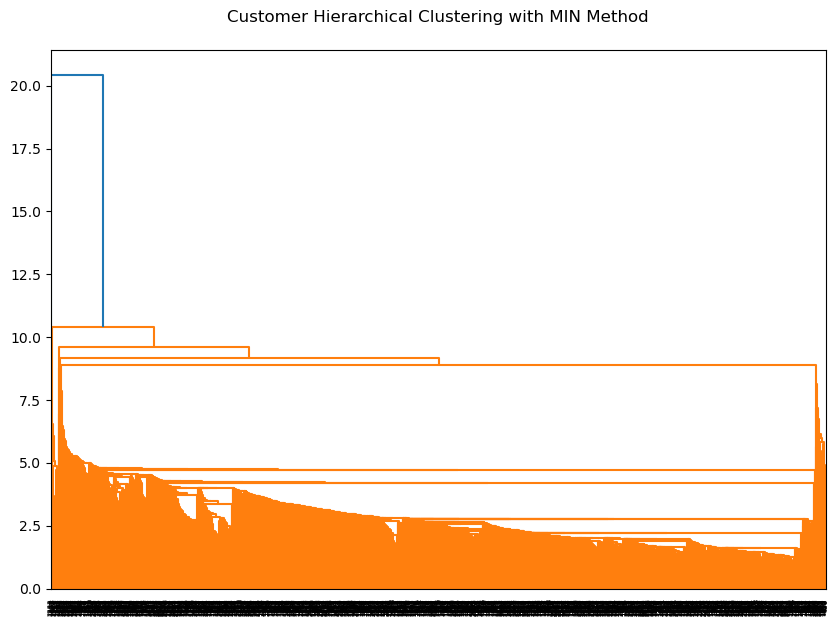

In [33]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df1, method="single"))

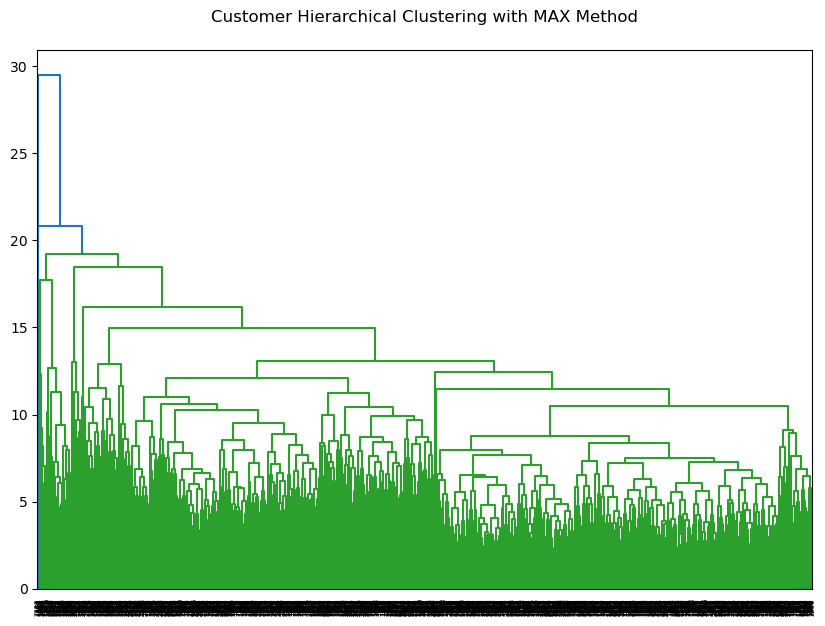

In [34]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MAX Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df1, method="complete"))

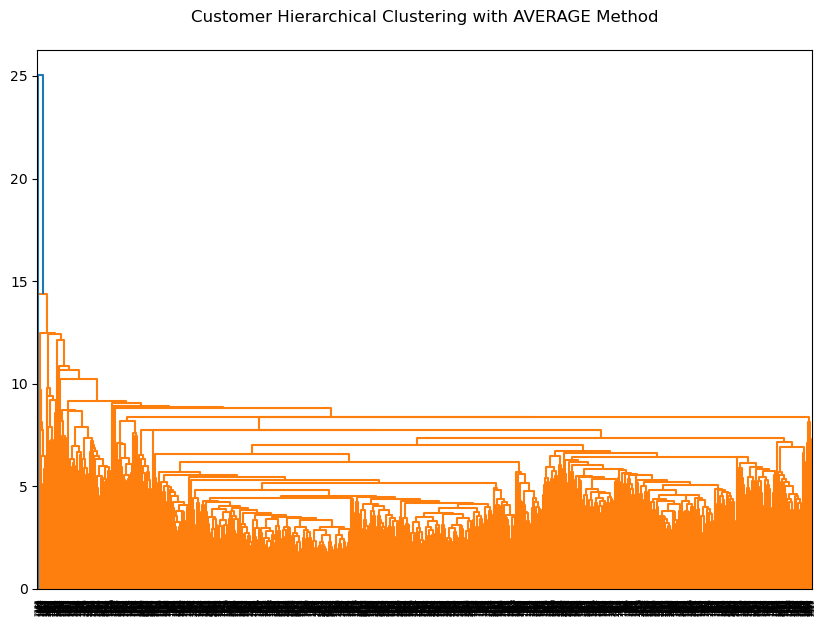

In [35]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with AVERAGE Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df1, method="average"))

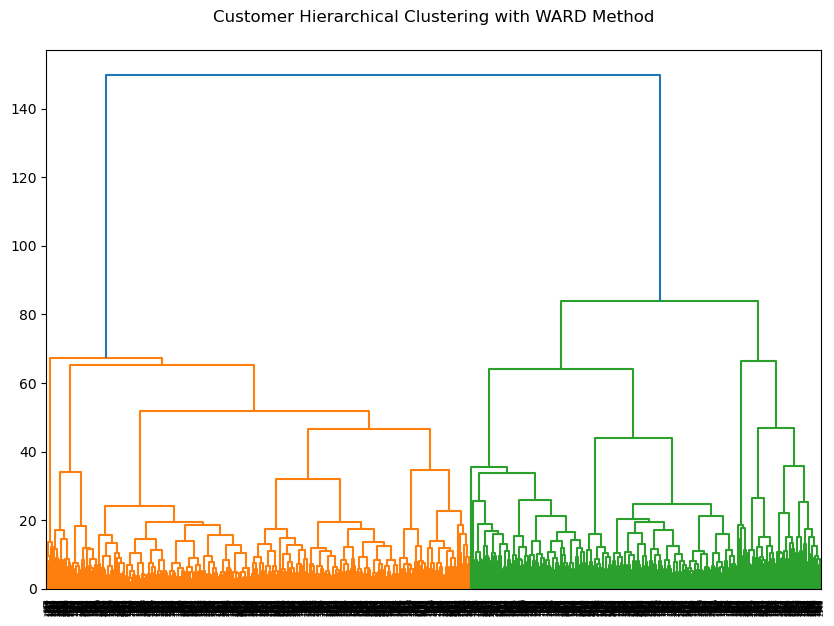

In [36]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with WARD Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df1, method="ward"))

### Identify Potential Customers for Marketing Campaigns using Hierarchy Clustering

In [37]:
# Pilih fitur yang relevan untuk clustering
columns_to_use = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
]
df_cluster = df1[columns_to_use]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)



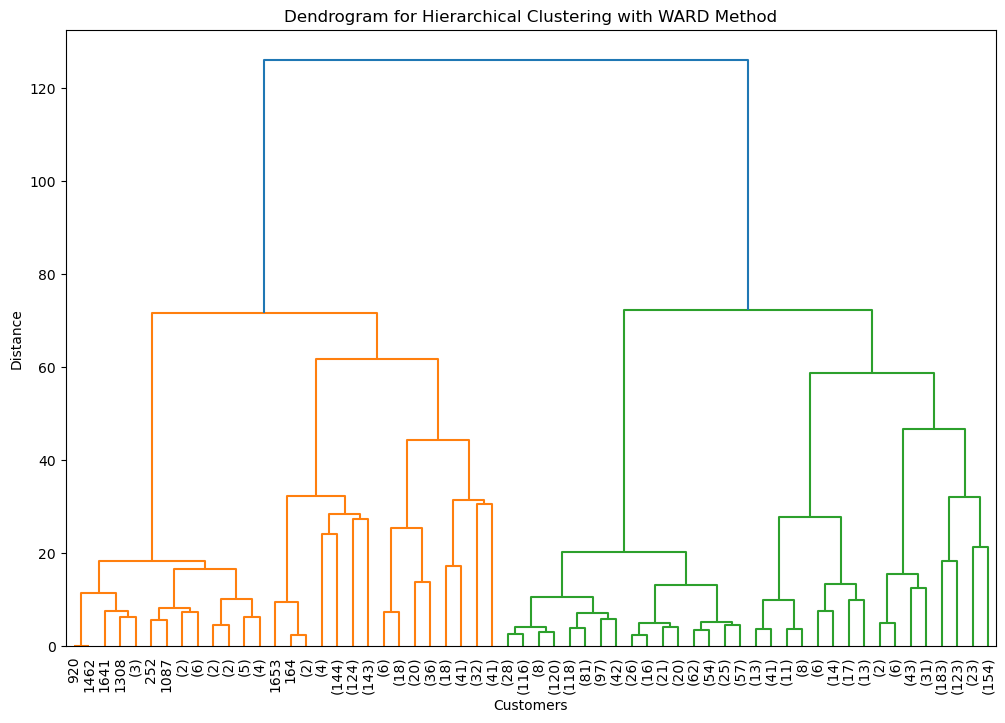

In [38]:
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(scaled_features, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering with WARD Method')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


In [ ]:
n_clusters = 3
df['Cluster'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age
Cluster,,,,,,,,,,,,,,,,,,,,,
1,1967.842663,2.366112,3.754917,73637.434191,0.063540,0.293495,325.169440,49.838124,609.851740,64.650530,...,3.279879,0.060514,0.128593,0.246596,0.204236,0.045386,0.004539,3.0,11.0,55.157337
2,1970.885522,2.261504,3.721661,35211.124579,0.766554,0.464646,327.312009,49.780022,34.828283,4.555556,...,6.240180,0.000000,0.000000,0.000000,0.000000,0.000000,0.013468,3.0,11.0,52.114478
3,1967.037791,2.591570,3.716570,52198.332849,0.392442,0.764535,331.204942,47.540698,358.534884,17.622093,...,6.077035,0.178779,0.119186,0.000000,0.013081,0.000000,0.008721,3.0,11.0,55.962209


C:\Users\yulia\AppData\Local\Temp\ipykernel_19072\4235328318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = clusters


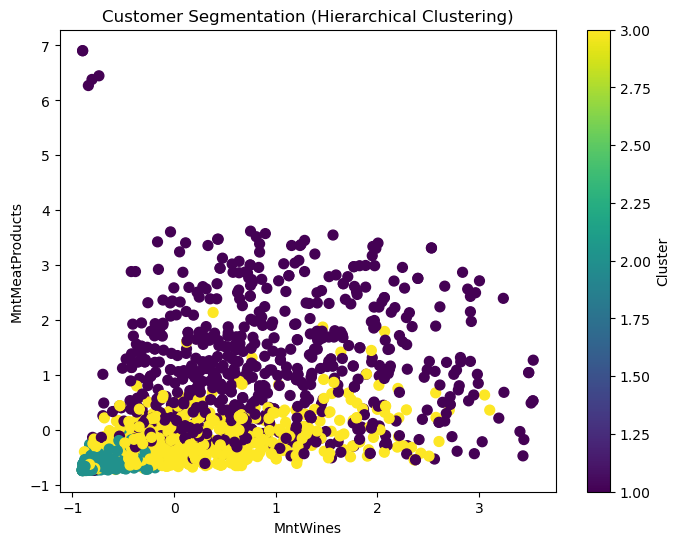

In [ ]:
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')  # t=3 means 3 clusters

df_cluster['Cluster'] = clusters

plt.figure(figsize=(8, 6))
plt.scatter(df_cluster['MntWines'], df_cluster['MntMeatProducts'], c=df_cluster['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segmentation (Hierarchical Clustering)")
plt.xlabel("MntWines")
plt.ylabel("MntMeatProducts")
plt.colorbar(label='Cluster')
plt.show()


In [41]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
label = model.fit_predict(df_cluster)
df1["Agglo"] = label
cluster_summary = df.groupby(y_pred)[columns_to_use].agg(pd.Series.mode)
cluster_summary = cluster_summary.rename_axis('agglo')
cluster_summary

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\yulia\AppData\Local\Temp\ipykernel_19072\3268348478.py:4: FutureWarning: ['MntMeatProducts'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_summary = df.groupby(y_pred)[columns_to_use].agg(pd.Series.mode)


,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
agglo,,,,,,,,,,,,,,
0,398,0,0,0,0,1,4,6,6,0,0,0,0,0
1,2,0,0,0,1,1,1,0,3,0,0,0,0,0
2,"[162, 520]",0,0,0,"[11, 15]",2,6,2,5,0,0,0,0,0


In [42]:
df.groupby(label)[columns_to_use].agg(pd.Series.mean)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,609.851740,64.650530,422.919818,90.835098,66.583964,82.714070,1.621785,5.621785,5.665658,8.363086,0.204236,0.045386,0.060514,0.128593,0.246596
1,358.534884,17.622093,111.409884,26.755814,18.045058,47.747093,3.635174,5.422965,2.640988,6.659884,0.013081,0.000000,0.178779,0.119186,0.000000
2,34.828283,4.555556,19.941639,6.292929,4.707071,12.441077,1.835017,1.911336,0.450056,3.209877,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
df1.groupby(label)["Agglo"].agg(pd.Series.count)

0    661
1    688
2    891
Name: Agglo, dtype: int64

- Cluster 1: Pelanggan Loyal dengan Pendapatan Tinggi
Karakteristik Utama:
Rata-rata Usia: Lahir pada tahun 1967 (usia sekitar 57 tahun).
Pendidikan: Pendidikan di atas rata-rata (2.37).
Pendapatan: Tinggi, rata-rata Rp73.637.000.
Anak-anak di Rumah: Sangat sedikit (Kidhome = 0.06).
Pengeluaran: Sangat tinggi, terutama untuk produk anggur (MntWines = 609) dan daging (MntMeatProducts = 401).
Jumlah Pembelian di Toko: Paling tinggi (8 kali per bulan).
Respon terhadap Kampanye: Cukup baik, terutama pada kampanye ke-5 (AcceptedCmp5 = 0.25).
Rekomendasi:
Fokuskan kampanye pemasaran premium untuk produk seperti anggur dan daging.
Pelanggan ini loyal dan memiliki potensi tinggi untuk menerima kampanye personal berbasis produk berkualitas tinggi.

- Cluster 2: Pelanggan Hemat dengan Respon Rendah
Karakteristik Utama:
Rata-rata Usia: Lahir pada tahun 1970 (usia sekitar 54 tahun).
Pendidikan: Sedikit di bawah rata-rata (2.26).
Pendapatan: Terendah di antara segmen lain (Rp35.211.000).
Anak-anak di Rumah: Lebih banyak, baik anak kecil (0.76) maupun remaja (0.46).
Pengeluaran: Sangat rendah untuk semua produk (misalnya, MntWines = 34, MntMeatProducts = 36).
Respon terhadap Kampanye: Tidak ada respon terhadap kampanye sebelumnya (semua AcceptedCmp = 0).
Rekomendasi:
Hindari fokus besar pada pelanggan ini untuk kampanye mendatang karena daya beli rendah dan respon negatif terhadap kampanye.
Jika perlu, tawarkan diskon besar atau paket hemat untuk menarik perhatian mereka.

- Cluster 3: Pelanggan Potensial dengan Pengeluaran Sedang
Karakteristik Utama: 
Rata-rata Usia: Lahir pada tahun 1967 (usia sekitar 57 tahun).
Pendidikan: Paling tinggi di antara segmen lain (2.59).
Pendapatan: Menengah, sekitar Rp52.198.000.
Anak-anak di Rumah: Sedang (Kidhome = 0.39, Teenhome = 0.76).
Pengeluaran: Cukup tinggi pada anggur (MntWines = 358) dan daging (MntMeatProducts = 226).
Respon terhadap Kampanye: Respon cukup baik pada kampanye ke-3 (AcceptedCmp3 = 0.18).
Rekomendasi:

Pelanggan ini merupakan segmen potensial untuk kampanye mendatang.
Tawarkan promosi yang berfokus pada produk favorit seperti anggur dan daging.
Gunakan kampanye berbasis hadiah atau diskon untuk meningkatkan loyalitas.
Kesimpulan Umum
Target Utama:

Cluster 1: Pelanggan dengan pengeluaran tinggi dan respon positif.
Cluster 3: Pelanggan potensial dengan pengeluaran sedang dan respon baik pada kampanye tertentu.
Fokus Kampanye:

Gunakan pendekatan personal untuk Cluster 1 dan Cluster 3, dengan promosi yang relevan seperti diskon pada produk favorit atau akses eksklusif.
Hindari alokasi besar pada Cluster 2 karena respon negatif dan daya beli rendah.
Strategi Lanjutan:

Analisis lebih dalam produk yang disukai di masing-masing cluster untuk meningkatkan konversi kampanye.
Eksplorasi waktu kampanye terbaik berdasarkan Recency (misalnya, rata-rata waktu terakhir pembelian).